# Linear Transformation

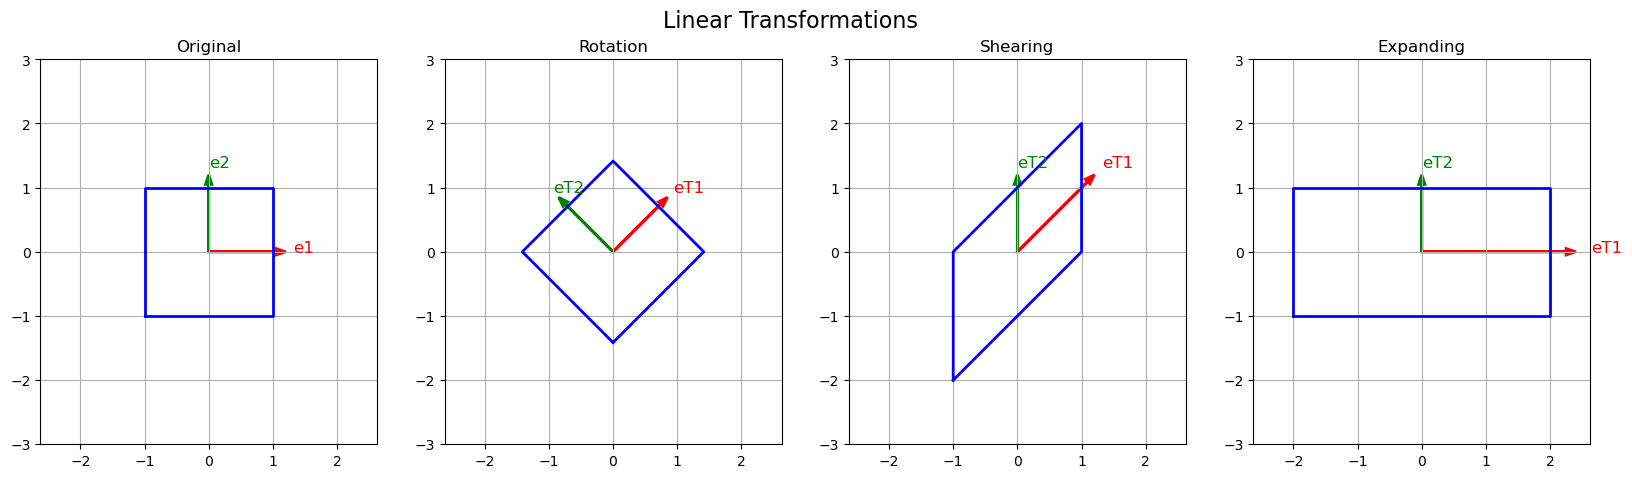

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Original square and basis -----
square = np.array([
    [-1, -1],
    [1, -1],
    [1, 1],
    [-1, 1],
    [-1, -1]
]).T

e1 = np.array([1, 0])
e2 = np.array([0, 1])

# ----- Define transformations -----
theta = np.radians(45)
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])

shear_matrix = np.array([
    [1, 0],
    [1, 1]
])

expand_matrix = np.array([
    [2, 0],
    [0, 1]
])

# Apply transformations
rotated_square = rotation_matrix @ square
sheared_square = shear_matrix @ square
expanded_square = expand_matrix @ square

# Transform basis vectors (eT1, eT2)
rotated_eT1, rotated_eT2 = rotation_matrix @ e1, rotation_matrix @ e2
sheared_eT1, sheared_eT2 = shear_matrix @ e1, shear_matrix @ e2
expanded_eT1, expanded_eT2 = expand_matrix @ e1, expand_matrix @ e2

# ----- Function to plot vectors -----
def plot_vector(ax, vec, color='k', label=None, scale=1.2):
    ax.arrow(0, 0, vec[0]*scale, vec[1]*scale,
             head_width=0.1, head_length=0.15, fc=color, ec=color, lw=2, length_includes_head=True)
    if label:
        ax.text(vec[0]*scale*1.1, vec[1]*scale*1.1, label, color=color, fontsize=12)

# ----- Compute global limits -----
all_points = np.hstack([square, rotated_square, sheared_square, expanded_square,
                        rotated_eT1.reshape(2,1), rotated_eT2.reshape(2,1),
                        sheared_eT1.reshape(2,1), sheared_eT2.reshape(2,1),
                        expanded_eT1.reshape(2,1), expanded_eT2.reshape(2,1)])
max_val = np.max(np.abs(all_points)) * 1.5

# ----- Plot all squares with transformed axes only -----
fig, axs = plt.subplots(1, 4, figsize=(20,5))
fig.suptitle("Linear Transformations", fontsize=16)

# Original
axs[0].plot(square[0], square[1], 'b', lw=2)
plot_vector(axs[0], e1, 'r', 'e1')
plot_vector(axs[0], e2, 'g', 'e2')
axs[0].set_title("Original")
axs[0].axis('equal')
axs[0].grid(True)
axs[0].set_xlim(-max_val, max_val)
axs[0].set_ylim(-max_val, max_val)

# Rotation
axs[1].plot(rotated_square[0], rotated_square[1], 'b', lw=2)
plot_vector(axs[1], rotated_eT1, 'r', 'eT1')
plot_vector(axs[1], rotated_eT2, 'g', 'eT2')
axs[1].set_title("Rotation")
axs[1].axis('equal')
axs[1].grid(True)
axs[1].set_xlim(-max_val, max_val)
axs[1].set_ylim(-max_val, max_val)

# Shearing
axs[2].plot(sheared_square[0], sheared_square[1], 'b', lw=2)
plot_vector(axs[2], sheared_eT1, 'r', 'eT1')
plot_vector(axs[2], sheared_eT2, 'g', 'eT2')
axs[2].set_title("Shearing")
axs[2].axis('equal')
axs[2].grid(True)
axs[2].set_xlim(-max_val, max_val)
axs[2].set_ylim(-max_val, max_val)

# Expanding
axs[3].plot(expanded_square[0], expanded_square[1], 'b', lw=2)
plot_vector(axs[3], expanded_eT1, 'r', 'eT1')
plot_vector(axs[3], expanded_eT2, 'g', 'eT2')
axs[3].set_title("Expanding")
axs[3].axis('equal')
axs[3].grid(True)
axs[3].set_xlim(-max_val, max_val)
axs[3].set_ylim(-max_val, max_val)

plt.show()

# Linear Transformation as Transforming Basis